## **Introduction**  

The global automotive landscape is undergoing a significant shift, with increasing consumer interest in **electric vehicles (EVs)** driven by advancements in technology, environmental concerns, and government incentives. In India, this transformation has been particularly notable in recent years, as more consumers are transitioning from **traditional fuel-powered vehicles (petrol and diesel) to EVs and hybrid alternatives**.  

This analysis aims to explore the **growing adoption of EVs** by examining vehicle registration trends across different fuel types from **2016 to 2024**. By leveraging official registration data from **vahan.parivahan.gov.in**, this study seeks to highlight the shift in consumer preferences and quantify the increasing market penetration of EVs.  

### **Objective**  
The primary focus of this study is to **demonstrate the rising interest in EVs** and analyze:  
- The **year-over-year growth** of EV registrations compared to conventional fuel types.  
- **Key milestones** that influenced EV adoption (e.g., government policies, major EV launches).  
- The **rate of decline** (if any) in petrol/diesel vehicle registrations.  

### **Methodology**  
This analysis will use **descriptive statistics, trend visualization, and comparative analysis** to identify patterns in fuel-type preferences. The data-driven insights will support discussions on the **market shift towards electric mobility** and provide empirical evidence for the increasing consumer demand for EVs.  

### **Sections in this Analysis**
- Packages
- Uploading the Datasets
- Compiling the Datasets
- Preprocessing
- Understanding the dataset
- Analysing the Key Trends
- Findings

<hr>

## Installing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<hr>

## Uploading the datasets

In [2]:
# loading the data of vehicles from year 2016 - 2019
df_16_19 = pd.read_excel('./data/16-19 vehicles.xlsx', header=None)

# loading the data of vehicles from year 2020 - 2024
df_20_24 = pd.read_excel('./data/20-24 vehicles by year.xlsx', header=None)

d:\Vahan parivahan\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Vahan parivahan\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<hr>

## Compiling the Datasets

In [3]:
# Data from year 2016 - 2019
df_16_19 = df_16_19.drop([0,1,2]).reset_index()
df_16_19.iloc[0,2] = "Fuel Type"

# Data from year 2020 - 2024
df_20_24 = df_20_24.drop([0,1,2]).reset_index()
df_20_24.iloc[0,2] = "Fuel Type"

# Combining the two datasets
df_vehicles_by_year = pd.concat([ df_20_24.iloc[:, 2:-1], df_16_19.iloc[:,3:-1]], axis=1)
df_vehicles_by_year.columns = df_vehicles_by_year.iloc[0]
df_vehicles_by_year.drop([0], inplace=True)

df_vehicles_by_year

,Fuel Type,2024,2023,2022,2021,2020,2019,2018,2017,2016
1,CNG ONLY,"4,82,363","4,21,341","2,97,450","1,66,339","43,257","33,539","31,498","26,269","30,256"
2,DIESEL,"26,38,300","25,69,397","23,46,314","20,14,421","20,25,883","29,26,791","31,83,671","28,67,205","27,52,005"
3,DIESEL/HYBRID,"5,249","2,462",737,35,"2,917","39,108","59,554","48,500","11,351"
4,DUAL DIESEL/BIO CNG,0,0,0,0,1,0,0,0,1
5,DUAL DIESEL/CNG,0,0,5,15,1,7,5,4,14
6,DUAL DIESEL/LNG,21,0,1,0,0,"1,66,885","1,30,243","87,389","49,825"
7,ELECTRIC(BOV),"14,57,348","15,32,423","10,24,996","3,32,371","1,24,672",8,17,22,3
8,ETHANOL,183,0,2,0,3,0,0,1,0
9,FUEL CELL HYDROGEN,15,0,0,0,0,7,0,2,5
10,LNG,349,244,20,3,14,"3,866","4,067","3,813","3,969"


<hr>

## **Understanding the Dataset**  

This analysis is based on data sourced from **vahan.parivahan.gov.in**, which serves as India's official vehicle registration database. The dataset provides a comprehensive record of registered vehicles across the country, along with details such as **total transactions and revenue generated** over the years.  

### **Dataset Overview**  
The dataset focuses on the **total number of vehicles registered in India from 2016 to 2024**, categorized by their **fuel type**. It enables a year-over-year comparison of vehicle registrations to track consumer preferences and market trends.  

### **Key Features of the Dataset**  
- **Time Period:** 2016 to 2024  
- **Categories:** Vehicle registrations based on **fuel type**  
- **Fuel Types Included:**  
  - **Electric Vehicles (EVs):** PURE EV, PLUG-IN HYBRID EV, STRONG HYBRID EV, ELECTRIC (BOV)  
  - **Conventional Fuel Vehicles:** Petrol, Diesel, CNG, LPG, and their hybrid variants  
- **Data Structure:**  
  - **Columns:** Represent years (2016–2024)  
  - **Rows:** Represent fuel types  
  - **Values:** Number of vehicles registered per year for each fuel type  

### **Key Notes**
- **Early Years Show Minimal Registrations:** Vehicle registration numbers were extremely low (mostly 0) in the earlier years.  
- **Rise in ELECTRIC(BOV) Registrations:** A noticeable increase in **ELECTRIC(BOV) registrations** in later years could be attributed to the growing adoption of **e-Rickshaws**.  
- **PURE EV Growth in 2024:** The surge in **PURE EV registrations in 2024** aligns with the launch of **TATA and Mahindra’s first PURE EVs in January and November 2024**, marking a significant shift towards electric mobility.  
- **Exclusion of 2025 Data:** Data for the year **2025 was not included in the analysis** as it might present an unclear picture due to incomplete or evolving registration trends.

### **Significance of the Dataset**  
This dataset allows us to:  
1. **Analyze the shift in consumer preference** from conventional fuel vehicles to EVs.  
2. **Identify trends in EV adoption** and compare their growth against traditional fuel types.   

This dataset provides a solid foundation for understanding India's evolving **automobile market dynamics**, particularly the increasing interest in **electric mobility**.  


<hr>

### **Data Preprocessing**  
Before conducting the analysis, the dataset was preprocessed to:  
- Convert numerical values into a consistent format (e.g., removing commas from numbers).  
- Handle missing or incomplete data. 
- Deciding broader themes based on Fuels.
    - Theme 1: (EV) 
        - PURE EV , ELECTRIC(BOV), PLUG-IN HYBRID EV, STRONG HYBRID EV
    - Theme 2: (Hybrid)
        - DIESEL/HYBRID, PETROL/HYBRID
    - Theme 3: (GAS)
        - CNG ONLY, LPG ONLY, PETROL/CNG, PETROL/LPG, DUAL DIESEL/CNG
    - Theme 4: Traditional Fuels (Studied Separately)
        - Petrol, Diesels
    - Other Fuels
- Transform the wide-format table into a long-format structure for effective visualization. (This step was taken later in the analysis)


In [7]:
# Cleaning the final dataset
df_vehicles_by_year.fillna(value=0, inplace=True)


# Formatting the numbers from string to int
columns = df_vehicles_by_year.columns
for col in columns:
    if col != 'Fuel Type':
        df_vehicles_by_year[col] = df_vehicles_by_year[col].astype(str).str.replace(',','', regex=True).astype('Int64')
df_vehicles_by_year


,Fuel Type,2024,2023,2022,2021,2020,2019,2018,2017,2016
1,CNG ONLY,482363,421341,297450,166339,43257,33539,31498,26269,30256
2,DIESEL,2638300,2569397,2346314,2014421,2025883,2926791,3183671,2867205,2752005
3,DIESEL/HYBRID,5249,2462,737,35,2917,39108,59554,48500,11351
4,DUAL DIESEL/BIO CNG,0,0,0,0,1,0,0,0,1
5,DUAL DIESEL/CNG,0,0,5,15,1,7,5,4,14
6,DUAL DIESEL/LNG,21,0,1,0,0,166885,130243,87389,49825
7,ELECTRIC(BOV),1457348,1532423,1024996,332371,124672,8,17,22,3
8,ETHANOL,183,0,2,0,3,0,0,1,0
9,FUEL CELL HYDROGEN,15,0,0,0,0,7,0,2,5
10,LNG,349,244,20,3,14,3866,4067,3813,3969


In [8]:
df_raw = df_vehicles_by_year.copy()

In [9]:
df_raw['Fuel Type'].unique()

array(['CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'DUAL DIESEL/BIO CNG',
       'DUAL DIESEL/CNG', 'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL',
       'FUEL CELL HYDROGEN', 'LNG', 'LPG ONLY', 'METHANOL',
       'NOT APPLICABLE', 'PETROL', 'PETROL/CNG', 'PETROL/ETHANOL',
       'PETROL/HYBRID', 'PETROL/LPG', 'PLUG-IN HYBRID EV', 'PURE EV',
       'SOLAR', 'STRONG HYBRID EV'], dtype=object)

In [10]:
# Create categories for easier analysis
def categorize_vehicles(df):
    # Create a copy of the dataframe to work with
    df_categories = df.copy()
    
    # Create a new dataframe with categories
    categories = pd.DataFrame({
        'Year': df.columns[1:].tolist()
    })
    
    # Electric vehicles (all types)
    categories['EV'] = df[df['Fuel Type'].isin([
        'ELECTRIC(BOV)', 'PURE EV', 'PLUG-IN HYBRID EV', 'STRONG HYBRID EV'
    ])][df.columns[1:]].sum().reset_index(drop=True)
    
    # Hybrid vehicles
    categories['Hybrid'] = df[df['Fuel Type'].isin([
        'DIESEL/HYBRID', 'PETROL/HYBRID'
    ])][df.columns[1:]].sum().reset_index(drop=True)
    
    # Gas vehicles (CNG/LPG)
    categories['Gas'] = df[df['Fuel Type'].isin([
        'CNG ONLY', 'LPG ONLY', 'PETROL/CNG', 'PETROL/LPG', 'DUAL DIESEL/CNG'
    ])][df.columns[1:]].sum().reset_index(drop=True)
    
    # Traditional fuel vehicles
    categories['Petrol'] = df[df['Fuel Type'] == 'PETROL'][df.columns[1:]].sum().reset_index(drop=True)
    categories['Diesel'] = df[df['Fuel Type'] == 'DIESEL'][df.columns[1:]].sum().reset_index(drop=True)
    
    # Others
    categories['Others'] = df[~df['Fuel Type'].isin([
        'ELECTRIC(BOV)', 'PURE EV', 'PLUG-IN HYBRID EV', 'STRONG HYBRID EV',
        'DIESEL/HYBRID', 'PETROL/HYBRID',
        'CNG ONLY', 'LPG ONLY', 'PETROL/CNG', 'PETROL/LPG', 'DUAL DIESEL/CNG',
        'PETROL', 'DIESEL'
    ])][df.columns[1:]].sum().reset_index(drop=True)
    
    # Total vehicles per year
    categories['Total'] = df[df.columns[1:]].sum().reset_index(drop=True)
    
    # # Calculate percentages
    for col in ['EV', 'Hybrid', 'Gas', 'Petrol', 'Diesel', 'Others']:
        categories[f'{col}_pct'] = (categories[col] / categories['Total']) * 100
    
    return categories


In [11]:
categories = categorize_vehicles(df_raw)
categories

,Year,EV,Hybrid,Gas,Petrol,Diesel,Others,Total,EV_pct,Hybrid_pct,Gas_pct,Petrol_pct,Diesel_pct,Others_pct
0,2024,2008831,300332,1249437,19290384,2638300,720652,26207936,7.664972,1.145958,4.767399,73.605125,10.066798,2.749747
1,2023,1532433,333701,997613,18131493,2569397,446486,24011123,6.38218,1.389777,4.154795,75.51289,10.700861,1.859497
2,2022,1024997,193032,757477,17178363,2346314,80493,21580676,4.749606,0.894467,3.509978,79.600671,10.872291,0.372986
3,2021,332371,125683,479345,15880107,2014421,82536,18914463,1.757232,0.664481,2.534278,83.957483,10.650162,0.436364
4,2020,124672,89135,333634,15975775,2025883,84105,18633204,0.669085,0.478366,1.790535,85.738207,10.872435,0.451372
5,2019,9,148422,33552,421331,2926791,20627277,24157382,0.000037,0.614396,0.138889,1.744109,12.115514,85.387055
6,2018,82,183714,31504,463465,3183671,21558042,25420478,0.000323,0.722701,0.123932,1.823195,12.524041,84.805809
7,2017,161,136695,26278,346070,2867205,19926033,23302442,0.000691,0.586612,0.112769,1.485123,12.304311,85.510493
8,2016,237,93996,30274,337314,2752005,18109268,21323094,0.001111,0.440818,0.141978,1.581919,12.906218,84.927957


<hr>

## Analysing the key trends

In [12]:
cat_sort = categories.sort_values(by='Year', ascending=True).reset_index().drop(columns=['index'])
year = cat_sort['Year']
ev_count = cat_sort['EV']

- ##### EV Growth Over Time:

    - <p> Bar chart showing the dramatic increase in electric vehicle registrations from 2016 to 2024
    - <p> Includes data labels for each year

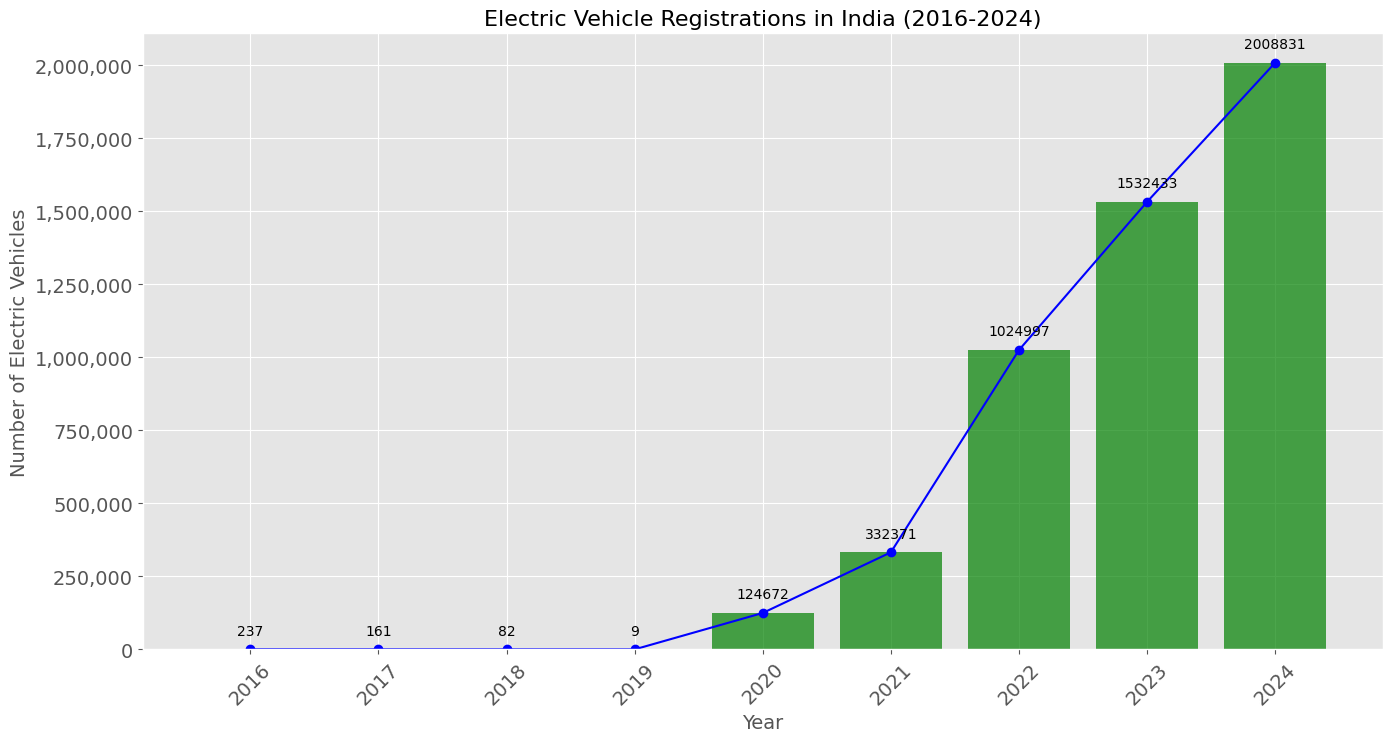

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Electric Vehicles', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Electric Vehicle Registrations in India (2016-2024)', fontsize=16)
plt.bar(x=year, height=ev_count, color='green', alpha=0.7)
plt.plot(year, ev_count,color='blue', marker='o', animated=True)
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
for i, v in enumerate(ev_count):
    plt.text(i, v + 50000, ev_count[i],ha='center', fontsize=10)

The graph above shows a massive surge in EV registrations in India from 2020 onward, with numbers skyrocketing from 124K in 2020 to over 2 million in 2024. EV adoption was minimal before 2019 but gained momentum due to government incentives, lower battery costs, and rising fuel prices. The steep growth post-2021 highlights a shift in consumer preference towards sustainable mobility. Policy support, infrastructure development, and popular EV models like Tata Nexon EV have fueled this boom. This trend signals India’s rapid transition to electric vehicles for a greener future. 🚀

- ##### EV Adoption Rate:

    - <p> Line chart showing the percentage of EVs among all vehicle registrations
    - <p> Helps identify the acceleration points in market penetration

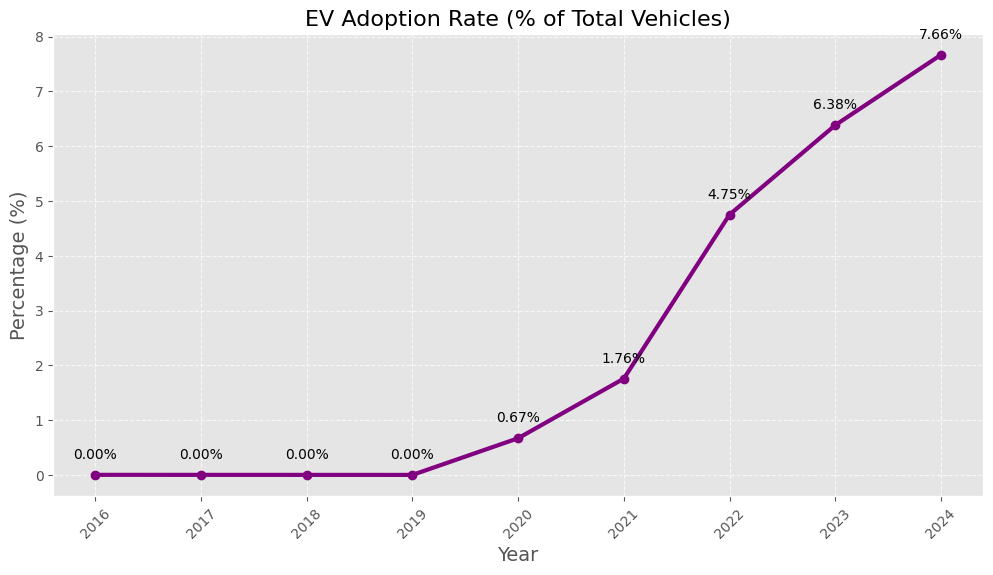

In [17]:
# 2. EV Adoption Rate (percentage)
plt.figure(figsize=(12, 6))
ev_pct = categories['EV_pct'][::-1]
years = cat_sort['Year']
plt.plot(years, ev_pct, marker='o', linewidth=3, color='purple')
plt.title('EV Adoption Rate (% of Total Vehicles)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for i, v in enumerate(ev_pct):
    plt.text(i, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10)



This graph illustrates India's EV adoption rate as a percentage of total vehicle registrations from 2016 to 2024. The adoption remained negligible until 2019 but started rising in 2020, reaching 7.66% by 2024. The sharp increase from 0.67% in 2020 to 4.75% in 2022 highlights a major shift towards EVs. Government policies, subsidies, rising fuel costs, and better EV infrastructure have significantly influenced this growth. The trend suggests that EVs are rapidly gaining mainstream acceptance in India. 🚗⚡

- ##### Fuel Type Comparison (2016 vs 2024):

    - <p> Side-by-side bar chart comparing the number of registrations by fuel type between 2016 and 2024
    - <p> Highlights the dramatic shift in the vehicle landscape

<Figure size 1400x800 with 0 Axes>

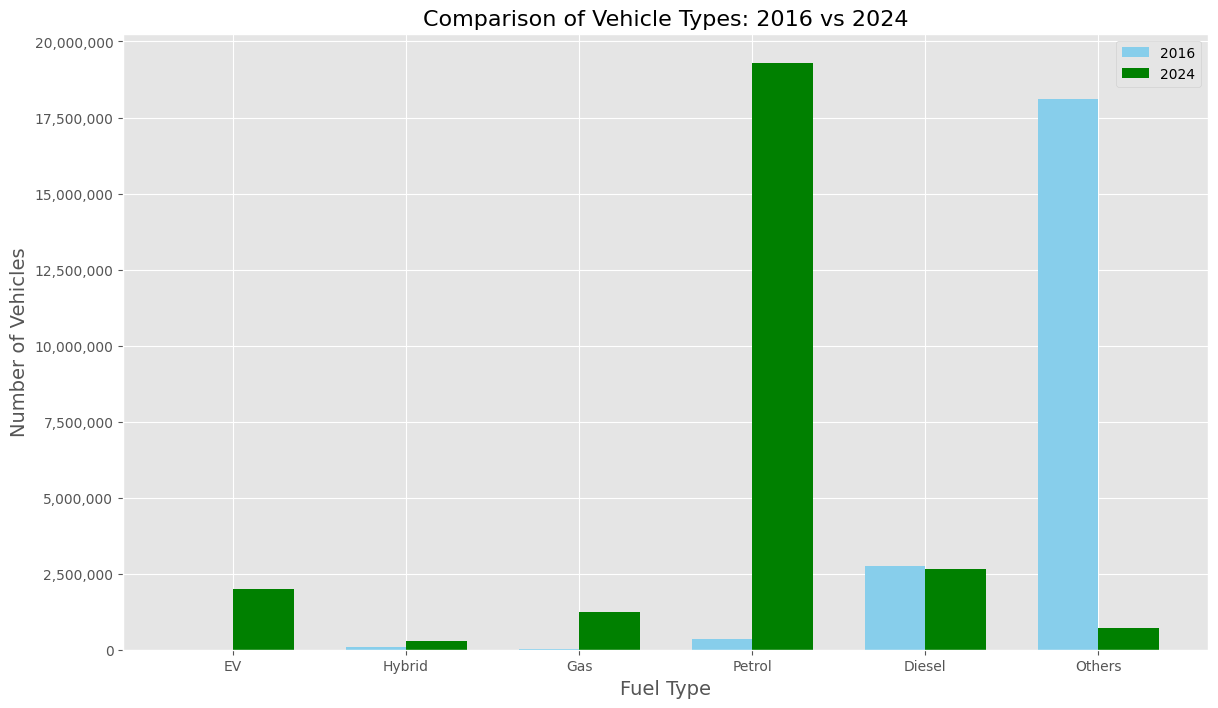

In [18]:
# 3. Fuel Type Comparison (2016 vs 2024)
plt.figure(figsize=(14, 8))

# Data for 2016 and 2024
fuel_types = ['EV', 'Hybrid', 'Gas', 'Petrol', 'Diesel', 'Others']
data_2016 = [categories[fuel_type][8] for fuel_type in fuel_types]  # 2016 is the last column
data_2024 = [categories[fuel_type][0] for fuel_type in fuel_types]  # 2024 is the first column

x = np.arange(len(fuel_types))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, data_2016, width, label='2016', color='skyblue')
rects2 = ax.bar(x + width/2, data_2024, width, label='2024', color='green')

ax.set_title('Comparison of Vehicle Types: 2016 vs 2024', fontsize=16)
ax.set_xlabel('Fuel Type', fontsize=14)
ax.set_ylabel('Number of Vehicles', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(fuel_types)
ax.legend()

# Format y-axis with commas for thousands
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


This bar chart compares vehicle types in 2016 vs. 2024 in India. EVs have surged significantly, while petrol vehicles remain dominant but have slightly declined. Diesel vehicle numbers are mostly stable, while hybrid and gas-powered vehicles have seen modest growth. The trend suggests a shift towards electrification and alternative fuels, reflecting government incentives, policy shifts, and consumer demand for sustainable transport. 🚗⚡

- ##### Market Share (2024):

    - <p> Pie chart comparing the proportion of market shares of vehicles by fuel types in 2024
    - <p> Highlights the current leader of fuel types in the vehicle landscape

FileNotFoundError: [Errno 2] No such file or directory: 'plots/market_share_2024.png'

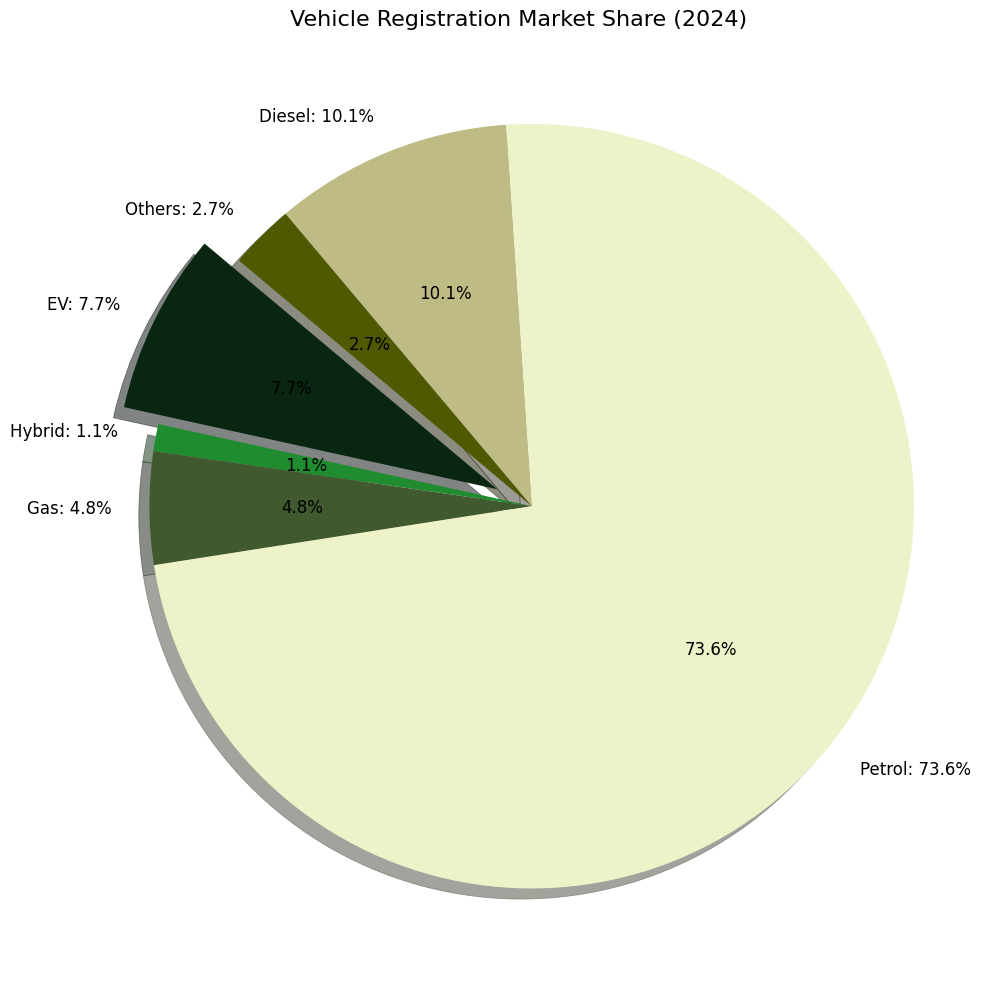

In [19]:
# 4. Market Share Pie Chart (2024)
plt.figure(figsize=(10, 10))

fuel_types = ['EV', 'Hybrid', 'Gas', 'Petrol', 'Diesel', 'Others']
sizes = [categories[fuel_type][0] for fuel_type in fuel_types]  # 2024 is the first column
percentages = [categories[f'{fuel_type}_pct'][0] for fuel_type in fuel_types]

# Create labels with percentages
labels = [f'{fuel_types[i]}: {percentages[i]:.1f}%' for i in range(len(fuel_types))]

colors = ['#092613', '#1F8C2F', '#40592E', '#EDF2C9', '#BFBB84', '#4F5902']
explode = (0.1, 0, 0, 0, 0, 0)  # explode the EV slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Vehicle Registration Market Share (2024)', fontsize=16)

plt.tight_layout()
plt.savefig('plots/market_share_2024.png', dpi=300)
# plt.close()


<p> This pie chart illustrates the vehicle registration market share for 2024. Petrol vehicles still dominate with 73.6% of the market, but EVs have grown to 7.7%, showing an increasing shift towards electrification. Diesel vehicles make up 10.1%, while gas-powered and hybrid vehicles have smaller shares at 4.8% and 1.1%, respectively. The "Others" category holds 2.7%.
<p> This highlights a gradual transition towards alternative fuels, with EV adoption rising, though petrol remains the most common fuel type. 🚗⚡

- ##### Evolution of EV Types:
    - <p> Stacked bar chart showing the breakdown of different EV technologies over time
    - <p> Shows how the EV market has diversified from ELECTRIC(BOV) to include PURE EV, PLUG-IN HYBRID, etc.

In [20]:
EV_data = df_raw.copy()
EV_data = EV_data[df_raw['Fuel Type'].isin(['ELECTRIC(BOV)', 'PURE EV', 'PLUG-IN HYBRID EV', 'STRONG HYBRID EV'])]
EV_data = EV_data.reset_index(drop=True).T

EV_data.columns = EV_data.iloc[0]


In [21]:
EV_data.drop(index='Fuel Type', inplace=True)
EV_data = EV_data.reset_index() 
EV_data.columns = ['Year', 'ELECTRIC(BOV)', 'PLUG-IN HYBRID EV', 'PURE EV','STRONG HYBRID EV']

In [22]:
EV_data_long = EV_data.melt(id_vars=['Year'], var_name='Fuel Type', value_name='Registrations')
EV_data_long['Year'] = EV_data_long['Year'].astype('Int64')
EV_data_long['Registrations'] = EV_data_long['Registrations'].astype('Int64')

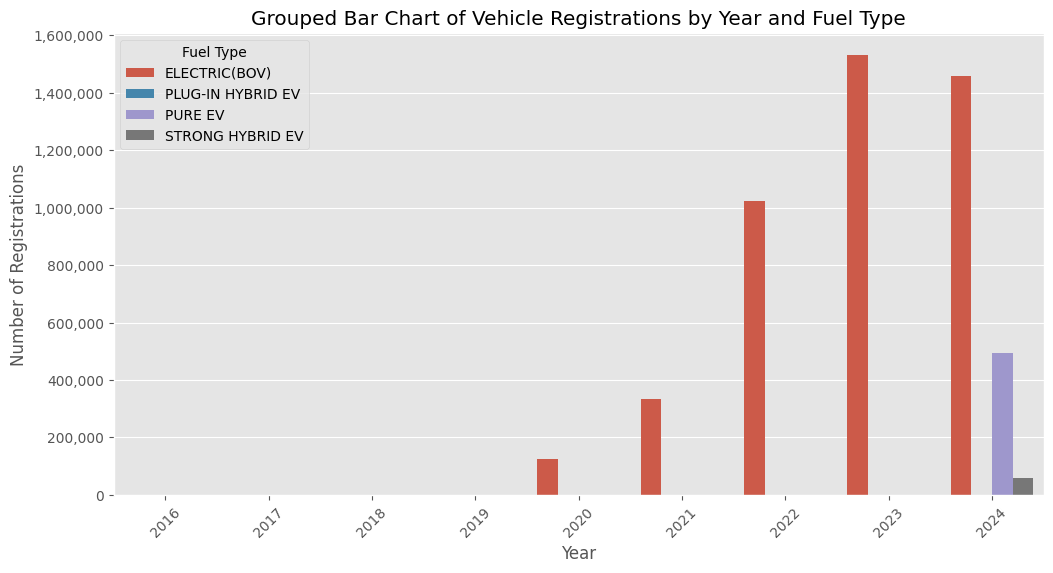

In [24]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar chart
sns.barplot(
    data=EV_data_long, 
    x="Year", 
    y="Registrations", 
    hue="Fuel Type"
)

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title("Grouped Bar Chart of Vehicle Registrations by Year and Fuel Type")
plt.ylabel("Number of Registrations")
plt.xlabel("Year")
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


# Show the plot
plt.show()

This **grouped bar chart** illustrates the **vehicle registrations by year and fuel type**, showing a significant rise in **electric (BOV) vehicle registrations** from 2020 to 2024.  

Key takeaways:  
- **Electric (BOV) registrations** have surged, reaching over **1.5 million in 2023** before slightly dropping in 2024.  
- **PURE EV registrations** started appearing in 2024, reaching around **500,000 units**.  
- **Plug-in hybrid EVs and strong hybrid EVs** have minimal presence, indicating that the market is primarily shifting towards fully electric vehicles rather than hybrids.  

This trend suggests a growing **adoption of electric vehicles (EVs)**, with **2023 being a peak year** for new EV registrations. 🚗⚡

<hr>

### **Key Findings**  

#### **1. Petrol Dominates the Market (Pie Chart)**
- **Petrol vehicles hold a massive 73.6% share** in 2024, making them the most registered vehicle type.  
- Diesel vehicles come in second with **10.1%**, showing a declining trend in fossil-fuel reliance.  
- **EVs (7.7%)** are growing but still significantly lower compared to petrol vehicles.  
- **Hybrid and gas vehicles** have minimal adoption, with just **1.1% and 4.8%**, respectively.  
- **"Others" category (2.7%)** suggests emerging alternative fuel types but not yet significant.

#### **2. Rapid Growth in EV Registrations (Bar Chart)**
-  **Early Years Show Minimal Registrations:** Vehicle registration numbers remained **extremely low (mostly 0s) in earlier years**, indicating a lack of adoption may be because of poor options or simply because of data availability. 
- **Electric (BOV) vehicles** saw a massive surge in registrations from **2020 to 2023**, peaking at **over 1.5 million in 2023**. This was likely driven by the **increasing adoption of e-Rickshaws**.  
- There was a slight dip in **2024**, possibly due to **market saturation or policy changes**.  
- **PURE EVs entered the market in 2024** with **over 500,000 registrations**, showing a rise in consumer preference for full electric models.  The reason behind this could be the **launch of TATA and Mahindra’s first PURE EVs in January and November 2024**, highlighting a major shift towards electric mobility. 
- As of 2024 Dec **Plug-in hybrid EVs and strong hybrid EVs** remain **very low in adoption**, indicating the shift towards fully electric models rather than hybrids.

#### **3. Shift Away from Diesel and Gas Vehicles**
- Diesel and gas vehicle shares are **low and declining**, suggesting a market shift towards **cleaner energy sources**.  
- The increasing **EV adoption aligns with global trends** toward sustainability and government incentives for clean energy vehicles. 


<hr> 

### **Conclusion**  

The analysis reflects a **gradual but significant transition towards electric vehicles**, especially from **2020 onwards**. While **petrol vehicles continue to dominate**, their share is expected to **decline over time** as EV adoption increases.  

Key trends observed:  
- **ELECTRIC(BOV) registrations** have grown steadily, likely due to the **rise in e-Rickshaws**.  
- **PURE EV registrations surged in 2024**, aligning with the launch of **TATA and Mahindra’s first PURE EVs** in January and November 2024.  
- **Diesel and gas vehicles are declining**, making way for **EVs and alternative fuel sources**.  
- **2023 marked the peak year for EV growth so far**, with increasing adoption expected in the coming years.  

Additionally, **2025 data was intentionally excluded** to prevent potential misinterpretation due to **incomplete or evolving registration data**.  

📊 **Overall, the market is shifting towards electrification, but petrol vehicles still hold a strong position in 2024. Future growth will depend on policy incentives, charging infrastructure, and battery advancements.** 🚗⚡